In [ ]:
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# fetch dataset
air_quality = fetch_ucirepo(id=1)

X = air_quality.data.features
y = air_quality.data.targets

In [ ]:
X.shape, y.shape

((4177, 8), (4177, 1))

Length               Axes(0.125,0.798085;0.168478x0.0819149)
Diameter          Axes(0.327174,0.798085;0.168478x0.0819149)
Height            Axes(0.529348,0.798085;0.168478x0.0819149)
Whole_weight      Axes(0.731522,0.798085;0.168478x0.0819149)
Shucked_weight       Axes(0.125,0.699787;0.168478x0.0819149)
Viscera_weight    Axes(0.327174,0.699787;0.168478x0.0819149)
Shell_weight      Axes(0.529348,0.699787;0.168478x0.0819149)
dtype: object

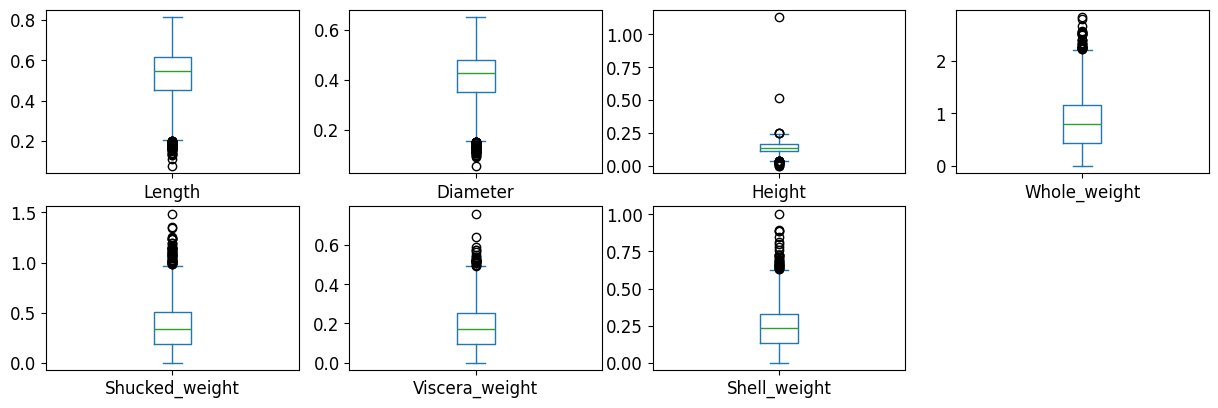

In [ ]:
data_mean = X.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [ ]:
le = LabelEncoder()
data_mean['Sex'] = le.fit_transform(data_mean['Sex'])

<Axes: >

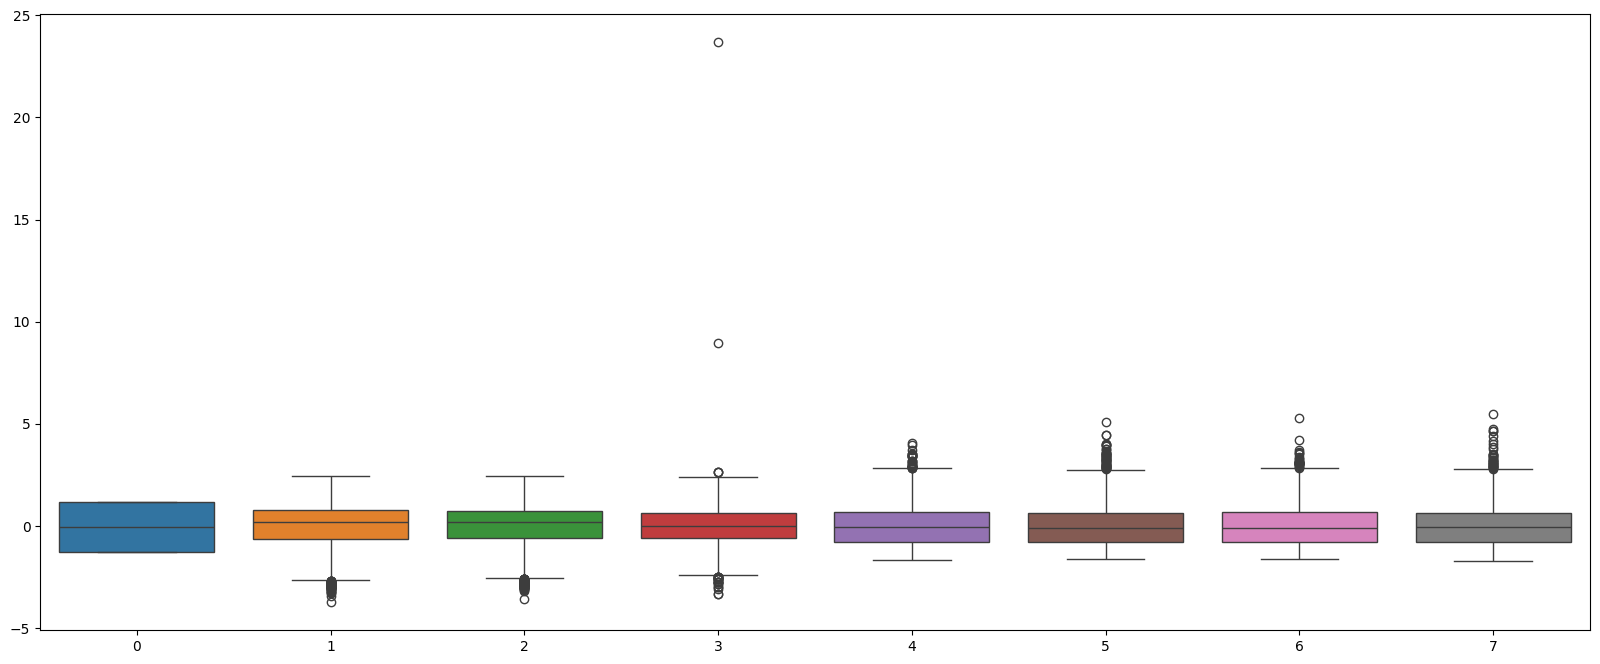

In [ ]:
scaler = StandardScaler()
Xs = scaler.fit_transform(data_mean)

# Print features normalised (Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [ ]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y.values.ravel(), test_size=0.2, random_state=1)

pca = PCA(n_components=6)
pca.fit(Xs_train)

Xs_train = pca.transform(Xs_train)
Xs_test = pca.transform(Xs_test)

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming Xs and y are already defined as the feature matrix and target vector
# Example: Xs = <your_feature_matrix>, y = <your_target_values>

# Define the MLP Regressor model
mlp_reg = MLPRegressor(random_state=1, max_iter=300)

# Number of folds for cross-validation
n_folds = 5

# Generate cross-validated predictions across all folds
y_pred = cross_val_predict(mlp_reg, Xs, y, cv=n_folds)

# Calculate the Mean Squared Error (MSE) for the combined predictions
mse = mean_squared_error(y, y_pred)

# Print the overall MSE of the model
print("Mean Squared Error (MSE): {:.2f}".format(mse))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conver

Mean Squared Error (MSE): 4.77


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
